# 8. Load Train Model From Checkpoint

add the coursework_model.zip file to the colab content folder before running!

In [ ]:
!unzip coursework_model.zip

Archive:  coursework_model.zip
   creating: model/checkpoint/
  inflating: model/checkpoint/checkpoint  
  inflating: model/checkpoint/ckpt-0.data-00000-of-00001  
  inflating: model/checkpoint/ckpt-0.index  
  inflating: model/pipeline.config   
   creating: model/saved_model/
   creating: model/saved_model/assets/
 extracting: model/saved_model/fingerprint.pb  
   creating: model/saved_model/variables/
  inflating: model/saved_model/variables/variables.data-00000-of-00001  
  inflating: model/saved_model/variables/variables.index  


In [ ]:
import os
# name of my model folder after unzipping
CUSTOM_MODEL_PATH = 'model'

# setting up paths, to be used later
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'IMAGE_PATH': os.path.join('militaryImages', 'images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join(CUSTOM_MODEL_PATH, 'checkpoint'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
files = {
    'PIPELINE_CONFIG':os.path.join(CUSTOM_MODEL_PATH, 'pipeline.config'),
}

# downloads set of 9 images from my test section of dataset
!git clone https://github.com/MarwanGutin/militaryImages

# creastes the paths
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

Cloning into 'militaryImages'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 636.82 KiB | 15.53 MiB/s, done.


In [ ]:
# allows us to get model from tensorflow zoo
if os.name=='nt':
    !pip install wget
    import wget
  # download the model from github tensorflow zoo
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 90161, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 90161 (delta 104), reused 153 (delta 85), pack-reused 89980
Receiving objects: 100% (90161/90161), 606.65 MiB | 28.40 MiB/s, done.
Resolving deltas: 100% (64948/64948), done.


In [ ]:
# Install Tensorflow Object Detection
# if on mac os
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .
# if on windows os
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Processing /content/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# the above code installs the newest tensorflow, tf 2.14.0, but that causes an error when training my model
# model only works with tf 2.13.0
#!pip uninstall tensorflow
!pip install tensorflow==2.13.0

  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstal

In [ ]:
# create the labelmap
labels = [{'name':'Grenade', 'id':1}, {'name':'Gun', 'id':2}, {'name':'Handgun', 'id':3}, {'name':'Knife', 'id':4},
          {'name':'Person', 'id':5}, {'name':'Soldier', 'id':6}, {'name':'Tank', 'id':7}]
with open('labelmap.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
print(paths['CHECKPOINT_PATH'])
#ckpt.restore(os.path.join('/content/FINALLLL/checkpoint', 'ckpt-0')).expect_partial()
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    # resizing and normalising the image
    image, shapes = detection_model.preprocess(image)
    # getting the predictions dictionary - containing info about the predicted bounding boxes
    prediction_dict = detection_model.predict(image, shapes)
    # un-normalise the image and bounding boxes to original size
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

model/checkpoint


# 9. Detect from an Image

In [ ]:
# importing required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# dictionary to change class integers to class names

category_index = label_map_util.create_category_index_from_labelmap('labelmap.pbtxt')
#category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

Set image paths to test

In [ ]:
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '02aff62d-104_jpeg_jpg.rf.c2a895e7b64e3ecdf09695b6b0d8cdd3.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1112_png_jpg.rf.ed93398bc1e15f2418fab70b423f1139.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1159_png_jpg.rf.a398716d10e54a25e6f95688258846db.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '145_png_jpg.rf.84c17c93a60c20988dfdd2478bef466d.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1200px-TankAltayT1_28129_jpg.rf.81eaea31035696109289d90f9ddfe5c7.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '2-196-_jpg.rf.b5559ac82e216e322d5ce6d6f7ad09f2.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '2-242-_jpg.rf.42a2d699b16299671dd80e23043d5b8a.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'depositphotos_110583148-stock-photo-set-of-guns-on-black_png_jpg.rf.c51328e3c1e6ee0acb4b6b1ca236f307.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'e4f66a347a66f05ce086618351b446e8-tactical-knives-tactical-gear_jpg.rf.6f929710b125df7502217b942a5ce560.jpg')


######## images for testing my built model ############

IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '02aff62d-104_jpeg_jpg.rf.c2a895e7b64e3ecdf09695b6b0d8cdd3.jpg')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '11_jpg.rf.e44ae69ed237e416f8361aae3d86a48a.jpg')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '11f0db65d699f524_jpg.rf.378fc088094ebe253173fe03be27a552.jpg')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '12_jpg.rf.5c96174724ee24658a7f29cdebfbd7e6.jpg')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '19_png_jpg.rf.2e9a687bf701b8d8d7d5e2b615a664c6.jpg')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '2-361-_jpg.rf.711684080b6304df6e768ef5a93a16a3.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '2-369-_jpg.rf.c102a1a3364990b53fdbddccd85b652f.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'ima541FG65D654GH6D54GH65D4GH65D4H65DFS4Gge_jpg.rf.edfacc27f9ab259c9907b0e0c73da00d.jpg')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'img5179171493356_jpg.rf.faceb2030280acce7017145265bfa885.jpg')

[0.95410377 0.853711   0.23807476 0.16605191 0.13472232 0.08311907
 0.075968   0.07073943 0.06914267 0.06503174 0.05751791 0.05567928
 0.05441184 0.0532407  0.05280955 0.05050647 0.05050631 0.04721602
 0.04609781 0.04550761 0.04485107 0.04466002 0.04270713 0.04096531
 0.04056447 0.03887403 0.03724553 0.03651476 0.03623787 0.0358078
 0.03533735 0.03530372 0.03517042 0.03512809 0.03488803 0.03488682
 0.03474516 0.03381818 0.03270108 0.03248568 0.03236613 0.031777
 0.03167075 0.03122706 0.03119061 0.03083788 0.03080944 0.03080677
 0.03073128 0.03054431 0.03047722 0.03032965 0.03017702 0.029991
 0.02991889 0.02943471 0.02935866 0.0289731  0.02895176 0.02846683
 0.0282452  0.02815188 0.02789141 0.02779027 0.02773527 0.02719477
 0.02705702 0.02698687 0.02688387 0.02623937 0.02599112 0.02595812
 0.02594979 0.02584966 0.02544312 0.02530832 0.02519575 0.02512378
 0.02506964 0.02457707 0.02453862 0.0245168  0.02438542 0.02434335
 0.02433594 0.02425315 0.02422423 0.02419381 0.02389886 0.02382885


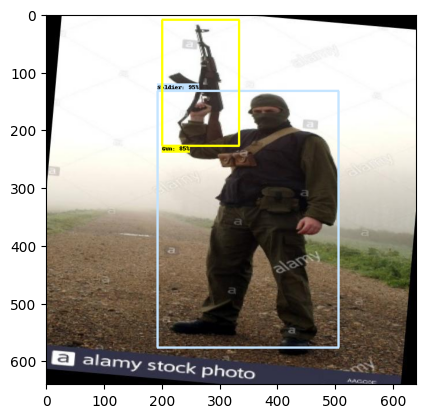

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# convert the array into a tensor
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# run the detections function on the image
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=8,
            min_score_thresh=0.49,
            agnostic_mode=False)

print(detections['detection_scores'])
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()